In [110]:
# imporing necessary packages
import pandas as pd
import numpy as np
import sympy.mpmath as math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pylab
%matplotlib inline

In [2]:
# Paramertization of the model

rmax = 0.18
kn = 1.4*10**(-2)
qp = 0.05
qz2 = 0.025
b = 0.5
gmax1 = 5
gmax2 = 10
Iv = 1.4*10**(-2)
dep = 20
sp = 3.0*10**(-12)
sz = 1.5*10**(-11)
umax = 1.4*10**(-11)
ks = 0.5
kp1 = 8.8*10**9
kp2 = 7.1*10**15
ss = 0.05

In [3]:
# defining the parameterization equations
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t+10)))
def sr(r, h, dl):
    return r*(h/dl)+(r*0.5*(1-h/dl))

def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

def srd(sr, M):
    return sr*math.e**(-0.1*M/2)
def sun(srd):
    return srd/(100+srd)
#srd/(100+srd)
#1-(srd/100)

def cz1(p):
    return p**2/(kp1**2+p**2)
def cz2(p):
    return p**2/(kp2**2+p**2)
def cp(n):
    return n/(kn+n)

def nr(M):
    return (0.42/10)*((M-20)/M)/8
def chk1(M):
    if M <= 20:
        return 0
    else:
        return 1
def chk2(n):
    if n >= 0.42:
        return 0
    else:
        return 1
#def gmax(st):
    #return 0.12*math.e**(0.069*st)
def qz1(st):
    return (2**st)/100000


    

# defining the differential n, p, z equations
def n_prime(cp, sun, nr, chk1, chk2):
  return  -p*sun*umax*cp + nr*chk1*chk2
def p_prime(n, p, z1, z2, cz1, cz2, cp, sun):
  return (p*rmax*cp*sun)-(qp*p)-(gmax1*cz1*z1)-(gmax2*cz2*z2)
def z1_prime(p, z1, cz, qz1):
  return (1-b)*gmax1*cz*z1-qz1*z1
def z2_prime(p, z2, cz, qz2):
  return (1-b)*gmax2*cz*z2-qz2*z2

#initial values
t = 0
t_i = 0.1
p = 1.0*10**7
z1 = 300
z2 = 10
n = 0.42

# Creating an array for the output values differential equation
t_array = []
p_array = []
z1_array = []
z2_array = []
n_array = []

while t <= 400:
  t = t + t_i
  new_n = n_prime(cp(n), sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))), nr(M(st(t), sw(t))), chk1(M(st(t), sw(t))), chk2(n))*t_i + n
  new_p = p_prime(n, p, z1, z2, cz1(p), cz2(p), cp(n), sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))))*t_i + p
  new_z1 = z1_prime(p, z1, cz1(p), qz1(st(t)))*t_i + z1
  new_z2 = z2_prime(p, z2, cz2(p), qz2)*t_i + z2
  p, z1, z2, n = new_p, new_z1,  new_z2, new_n
  t_array.append(t)
  p_array.append(p)
  z1_array.append(z1)
  z2_array.append(z2)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton_1': z1_array, 'zooplankton_2': z2_array, 'nitrogen': n_array}
print(output)

{'phytoplankton': [mpf('9967144.4854352698'), mpf('9934412.2560231611'), mpf('9901803.4554884881'), mpf('9869317.2417657487'), mpf('9836953.2676456999'), mpf('9804711.1862988006'), mpf('9772590.6512825303'), mpf('9740591.3165486306'), mpf('9708712.8364502583'), mpf('9676954.8657490592'), mpf('9645317.0596221555'), mpf('9613799.0736690536'), mpf('9582400.563918462'), mpf('9551121.1868350394'), mpf('9519960.5993260518'), mpf('9488918.4587479588'), mpf('9457994.4229129106'), mpf('9427188.1500951778'), mpf('9396499.2990374919'), mpf('9365927.5289573167'), mpf('9335472.4995530378'), mpf('9305133.8710100818'), mpf('9274911.3040069509'), mpf('9244804.4597211909'), mpf('9214812.9998352826'), mpf('9184936.5865424573'), mpf('9155174.8825524431'), mpf('9125527.5510971341'), mpf('9095994.2559361905'), mpf('9066574.6613625679'), mpf('9037268.4322079755'), mpf('9008075.2338482663'), mpf('8978994.7322087511'), mpf('8950026.5937694516'), mpf('8921170.4855702817'), mpf('8892426.0752161611'), mpf('88637

In [4]:
output_df = pd.DataFrame(output)
output_df.to_csv('output.csv')

In [5]:
npz_model = pd.read_csv('output.csv', sep=',')
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton_1,zooplankton_2
0,0,0.419999,9967144.485435,0.1,299.921675,9.975000
1,1,0.420373,9934412.256023,0.2,299.843337,9.950062
2,2,0.420372,9901803.455488,0.3,299.764986,9.925187
3,3,0.420370,9869317.241766,0.4,299.686622,9.900374
4,4,0.420369,9836953.267646,0.5,299.608244,9.875623


In [6]:
npz_model['zooplankton'] = npz_model['zooplankton_1']+npz_model['zooplankton_2']
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton_1,zooplankton_2,zooplankton
0,0,0.419999,9967144.485435,0.1,299.921675,9.975000,309.896675
1,1,0.420373,9934412.256023,0.2,299.843337,9.950062,309.793399
2,2,0.420372,9901803.455488,0.3,299.764986,9.925187,309.690173
3,3,0.420370,9869317.241766,0.4,299.686622,9.900374,309.586996
4,4,0.420369,9836953.267646,0.5,299.608244,9.875623,309.483867


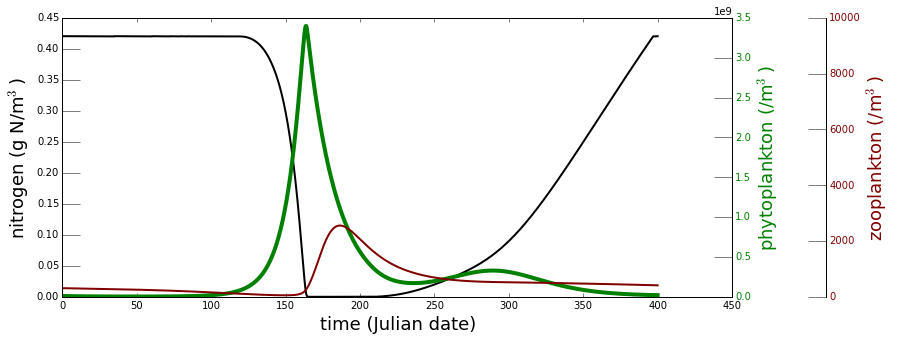

In [7]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'green', linewidth=4)
ax3.plot(npz_model.time, npz_model.zooplankton, 'maroon', linewidth=2)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k', size=18)
ax2.yaxis.set_tick_params(labelcolor='green', size=18)
ax3.yaxis.set_tick_params(labelcolor='maroon', size=18)
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('time (Julian date)', fontsize=18, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 18, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 18, color='green')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 18, color='maroon')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

plt.show()

In [8]:
def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
  return (((1.9/st)**1.95)*(sw/2)**0.51)*2000
t=0
ti=1

t_array = []
M_array = []

while t <= 400:
    t = t + ti
    new_M = M(st(t), sw(t))
    t_array.append(t)
    M_array.append(new_M)
    new_M = M
    
output_1 = {'time': t_array, 'Mixed_layer': M_array}
print(output_1)

{'Mixed_layer': [mpf('70.122012656184879'), mpf('69.963478063060606'), mpf('69.791817721270064'), mpf('69.607192440537304'), mpf('69.409774269291873'), mpf('69.199746138831841'), mpf('68.977301488035877'), mpf('68.742643869968276'), mpf('68.495986541770563'), mpf('68.237552039274078'), mpf('67.967571737801109'), mpf('67.68628540065005'), mpf('67.39394071677691'), mpf('67.090792829197696'), mpf('66.777103855639524'), mpf('66.453142402964886'), mpf('66.119183076882436'), mpf('65.775505988441182'), mpf('65.42239625878031'), mpf('65.060143523577196'), mpf('64.689041438599986'), mpf('64.309387187730806'), mpf('63.921480994777944'), mpf('63.525625640345737'), mpf('63.122125984975384'), mpf('62.71128849971096'), mpf('62.293420805184162'), mpf('61.868831220244445'), mpf('61.437828321097115'), mpf('61.00072051184052'), mpf('60.557815607225102'), mpf('60.109420428384936'), mpf('59.655840412221188'), mpf('59.197379235044949'), mpf('58.734338451015624'), mpf('58.2670171458401'), mpf('57.7957116061

In [9]:
output_1_df = pd.DataFrame(output_1)
output_1_df.to_csv('output_1.csv')

In [10]:
output_model_1 = pd.read_csv('output_1.csv', sep=',')
output_model_1.head()

,Unnamed: 0,Mixed_layer,time
0,0,70.122013,1
1,1,69.963478,2
2,2,69.791818,3
3,3,69.607192,4
4,4,69.409774,5


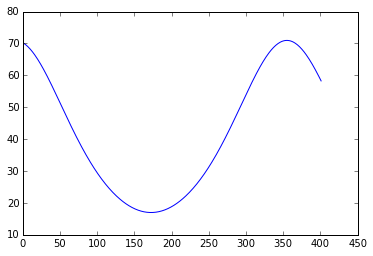

In [11]:
plt.plot(output_model_1.time, output_model_1.Mixed_layer)

In [12]:
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))

t=0
ti=1

t_array = []
st_array = []
sw_array = []
h_array = []

while t <= 400:
    t = t + ti
    new_st = st(t)
    new_sw = sw(t)
    new_h = h(t)
    t_array.append(t)
    st_array.append(new_st)
    sw_array.append(new_sw)
    h_array.append(new_h)
    new_st = st
    new_sw = sw
    new_h = h
    
    
output_2 = {'time': t_array, 'sea_surface_temperature': st_array, 
            'significant_wave_height':sw_array, 'sunlight': h_array}
print(output_2)

{'sunlight': [mpf('3.0714975765279977'), mpf('3.085039680132339'), mpf('3.0997418709712208'), mpf('3.1155997924681982'), mpf('3.13260874557889'), mpf('3.1507636901834055'), mpf('3.1700592465798429'), mpf('3.19048969707841'), mpf('3.2120489876956988'), mpf('3.2347307299486117'), mpf('3.258528202747407'), mpf('3.2834343543873028'), mpf('3.3094418046380496'), mpf('3.3365428469308513'), mpf('3.3647294506419883'), mpf('3.3939932634724639'), mpf('3.4243256139229721'), mpf('3.4557175138634482'), mpf('3.4881596611964474'), mpf('3.521642442613556'), mpf('3.5561559364440227'), mpf('3.5916899155947628'), mpf('3.6282338505808687'), mpf('3.6657769126457205'), mpf('3.7043079769697829'), mpf('3.7438156259671285'), mpf('3.7842881526687147'), mpf('3.8257135641914104'), mpf('3.8680795852917487'), mpf('3.9113736620033426'), mpf('3.9555829653569012'), mpf('4.0006943951817258'), mpf('4.0466945839875734'), mpf('4.093569900925738'), mpf('4.1413064558281558'), mpf('4.1898901033233713'), mpf('4.239306447028111

In [13]:
output_2_df = pd.DataFrame(output_2)
output_2_df.to_csv('output_2.csv')

In [14]:
output_model_2 = pd.read_csv('output_2.csv', sep=',')
output_model_2.head()

,Unnamed: 0,sea_surface_temperature,significant_wave_height,sunlight,time
0,0,8.035749,0.695531,3.071498,1
1,1,8.042520,0.694685,3.085040,2
2,2,8.049871,0.693766,3.099742,3
3,3,8.057800,0.692775,3.115600,4
4,4,8.066304,0.691712,3.132609,5


In [15]:
gwv = pd.read_csv('../../Computation_Physical_Sciences/Kyles_project/data/c46131.csv', sep=',')

In [16]:
gwv.index = gwv.DATE
gwv.index = pd.to_datetime(gwv.index)
del gwv["DATE"]
gwv.head()

,STN_ID,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,...,WSS$,wind_gust_speed,wind_direction.1,wind_speed.1,WSS$.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,,,
1992-10-20 12:09:00,C46131,1,49.91,124.99,18,2.31,5.89,2.4,4.8,5.9,...,NaN,15.2,118,11.9,NaN,14.5,998.0,990.1,12.0,10.3
1992-10-20 13:09:00,C46131,1,49.91,124.99,18,2.18,6.92,2.3,4.5,6.9,...,NaN,17.3,134,13.8,NaN,16.9,998.1,990.1,12.8,10.3
1992-10-20 14:09:00,C46131,1,49.91,124.99,18,2.34,6.40,2.4,4.2,6.4,...,NaN,15.6,132,12.3,NaN,15.1,997.7,990.1,12.9,10.2
1992-10-20 15:09:00,C46131,1,49.91,124.99,18,2.02,6.40,2.1,4.1,6.4,...,NaN,14.1,143,11.3,NaN,13.7,999.5,990.1,12.7,10.2
1992-10-20 16:09:00,C46131,1,49.91,124.99,18,1.54,6.40,1.6,3.2,6.4,...,NaN,10.5,172,7.6,NaN,10.1,1001.5,990.1,12.4,10.2


In [17]:
def yearly(year, dataset):
    
    if year == 2009:
        yr = '2009'
    if year == 2010:
        yr = '2010'
    if year == 2011:
        yr = '2011'
    if year == 2012:
        yr = '2012'
    data_sep = dataset[yr]
    return data_sep

In [18]:
gwv_2009 = yearly(2009, gwv)
gwv_2009.head()

,STN_ID,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,...,WSS$,wind_gust_speed,wind_direction.1,wind_speed.1,WSS$.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:32:00,C46131,1,49.91,124.99,14,0.14,2.22,0.1,0.4,2.5,...,NaN,6.7,171,5.5,NaN,7.1,1014.4,1014.5,4.5,7.0
2009-01-01 01:32:00,C46131,1,49.91,124.99,14,0.16,2.22,0.2,0.5,2.0,...,NaN,3.2,167,2.5,NaN,3.5,1014.3,1014.4,4.5,7.0
2009-01-01 02:32:00,C46131,1,49.91,124.99,14,0.16,2.22,0.2,0.6,2.1,...,NaN,7.5,177,6.3,NaN,7.9,1013.8,1013.8,4.5,7.1
2009-01-01 03:32:00,C46131,1,49.91,124.99,14,0.24,2.74,0.2,0.6,2.8,...,NaN,7.2,180,6.1,NaN,7.7,1013.7,1013.8,4.7,7.2
2009-01-01 04:32:00,C46131,1,49.91,124.99,14,0.34,3.24,0.3,0.7,3.1,...,NaN,3.8,203,3.1,NaN,4.1,1013.6,1013.6,4.0,7.2


In [19]:
gwv_2009_f = gwv_2009.fillna(0)

In [20]:
gwv_2009_w = gwv_2009_f.resample('W', how = 'mean')

In [21]:
gwv_2009_d = gwv_2009_w.resample('D', how = 'mean')
gwv_2009_d

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,...,WSS$,wind_gust_speed,wind_direction.1,wind_speed.1,WSS$.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-04,1.000000,49.91,124.99,14,0.843125,3.952188,0.847917,1.969792,3.953125,196.708333,...,0,9.860417,191.281250,8.294792,0,10.415625,1011.330208,1011.379167,2.900000,6.947917
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-11,1.125000,49.91,124.99,14,0.792440,4.187619,0.793452,1.718452,4.138095,173.898810,...,0,8.276786,165.785714,7.041667,0,8.769643,1015.784524,1015.833929,5.412500,6.964286
2009-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
gwv_2009_d.reset_index(level=0, inplace=True)
gwv_2009_d.head()

,DATE,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,...,WSS$,wind_gust_speed,wind_direction.1,wind_speed.1,WSS$.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
0,2009-01-04,1,49.91,124.99,14,0.843125,3.952188,0.847917,1.969792,3.953125,...,0,9.860417,191.28125,8.294792,0,10.415625,1011.330208,1011.379167,2.9,6.947917
1,2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
gwv_2009_dd = gwv_2009_d.dropna()
gwv_2009_dd.head()

,DATE,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,...,WSS$,wind_gust_speed,wind_direction.1,wind_speed.1,WSS$.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
0,2009-01-04,1.000000,49.91,124.99,14,0.843125,3.952188,0.847917,1.969792,3.953125,...,0,9.860417,191.281250,8.294792,0,10.415625,1011.330208,1011.379167,2.900000,6.947917
7,2009-01-11,1.125000,49.91,124.99,14,0.792440,4.187619,0.793452,1.718452,4.138095,...,0,8.276786,165.785714,7.041667,0,8.769643,1015.784524,1015.833929,5.412500,6.964286
14,2009-01-18,3.125000,49.91,124.99,14,0.050357,3.248155,0.032738,0.152976,3.014881,...,0,2.304167,233.767857,1.809524,0,2.686905,1033.626190,1033.670833,3.301786,6.675000
21,2009-01-25,3.089286,49.91,124.99,14,0.082143,3.312321,0.060119,0.279762,3.069643,...,0,3.087500,237.154762,2.461905,0,3.576786,1024.559524,1024.597024,1.717262,6.077976
28,2009-02-01,1.410714,49.91,124.99,14,0.510060,3.590595,0.508333,1.164286,3.604762,...,0,6.791667,176.773810,5.830952,0,7.318452,1028.844048,1028.889881,4.241071,6.967857


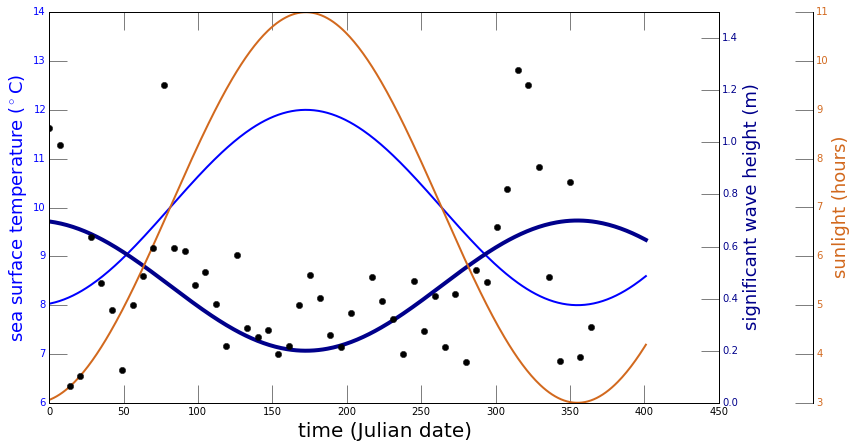

In [24]:
fig = plt.figure(figsize=(12, 7))

# Adding a title to the graph
#plt.suptitle('Simulated and Empirical Environmental Influences', fontsize=30, y=1.05)

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()


# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(output_model_2.time, output_model_2.sea_surface_temperature, 'blue', linewidth =2)
ax2.plot(output_model_2.time, output_model_2.significant_wave_height, 'darkblue', linewidth=4)
ax3.plot(output_model_2.time, output_model_2.sunlight, 'chocolate', linewidth=2)
ax4.plot(gwv_2009_dd.index, gwv_2009_dd.sig_wave_height, 'k', linestyle='', marker='.', markersize=12)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.xaxis.set_tick_params(labelcolor='k', size=18)
ax1.yaxis.set_tick_params(labelcolor='blue', size=18)
ax2.yaxis.set_tick_params(labelcolor='darkblue', size=18)
ax3.yaxis.set_tick_params(labelcolor='chocolate', size=18)
ax4.yaxis.set_ticks([])


# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel("time (Julian date)", fontsize=20, y=0)
ax1.set_ylabel('sea surface temperature ($^\circ$C)', fontsize = 18, color ='blue')
ax2.set_ylabel('significant wave height (m)', fontsize = 18, color='darkblue')
ax3.set_ylabel('sunlight (hours)', fontsize = 18, color='chocolate')

ax1.set_ylim(6, 14)
#ax3.set_ylim(0, 20)
ax2.set_ylim(0, 1.5)



plt.show()

In [25]:
# loading both the environment Canada data and the zooplankton data
zoo = pd.read_csv('../../Computation_Physical_Sciences/Kyles_project/data/Zooplankton_2009-2012.csv', sep=',')


In [26]:
zoo.index = zoo.DATE
zoo.index = pd.to_datetime(zoo.index)
del zoo["DATE"]
zoo.head()



,copepods,Cirripedia,euph. larvae,euphausid,Ostracods,Oiklioplera,Bryozoan Larvae(m3),Decapod,Cnidarians,Annelids,Malacostra,Cladocera,Chaetognath,mollusc/gastropod,Other larvae,Total_Zooplankton_Abundance
DATE,,,,,,,,,,,,,,,,
2009-02-24,56.36,0.13,0.00,0.51,1.65,1.40,0.13,0.76,2.42,0.00,0.25,0,0.51,0.00,0.89,65.01
2009-03-02,1.15,70.23,0.00,0.25,1.27,0.25,0.38,1.02,1.27,0.00,0.89,0,0.51,0.00,0.00,77.35
2009-03-10,147.46,134.86,40.08,0.64,1.40,7.63,1.78,0.76,0.51,2.93,0.76,0,0.76,0.00,0.25,339.82
2009-03-20,68.58,20.87,41.09,0.64,1.40,7.63,4.71,1.53,0.51,1.40,0.13,0,0.13,0.25,0.38,149.49
2009-03-24,88.04,14.89,20.10,1.91,30.15,6.49,2.29,1.91,1.02,1.53,0.00,0,0.25,0.00,0.51,169.21


In [27]:
zoo_2009 = yearly(2009, zoo)
zoo_2010 = yearly(2010, zoo)
zoo_2011 = yearly(2011, zoo)
zoo_2012 = yearly(2012, zoo)

In [28]:
zoo_2009_f = zoo_2009.fillna(0)
zoo_2010_f = zoo_2010.fillna(0)
zoo_2011_f = zoo_2011.fillna(0)
zoo_2012_f = zoo_2012.fillna(0)

In [29]:
zoo_2009_d = zoo_2009_f.resample('D', how = 'mean')
zoo_2010_d = zoo_2010_f.resample('D', how = 'mean')
zoo_2011_d = zoo_2011_f.resample('D', how = 'mean')
zoo_2012_d = zoo_2012_f.resample('D', how = 'mean')

In [30]:
zoo_2010_d.head()


,copepods,Cirripedia,euph. larvae,euphausid,Ostracods,Oiklioplera,Bryozoan Larvae(m3),Decapod,Cnidarians,Annelids,Malacostra,Cladocera,Chaetognath,mollusc/gastropod,Other larvae,Total_Zooplankton_Abundance
DATE,,,,,,,,,,,,,,,,
2010-03-05,309.4,1,0.5,0.5,4.1,1.3,0,0,0.5,0,1,0,0,0,0,318.3
2010-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
zoo_2009_d.reset_index(level=0, inplace=True)
zoo_2010_d.reset_index(level=0, inplace=True)
zoo_2011_d.reset_index(level=0, inplace=True)
zoo_2012_d.reset_index(level=0, inplace=True)

In [32]:
zoo_2012_d.head()

,DATE,copepods,Cirripedia,euph. larvae,euphausid,Ostracods,Oiklioplera,Bryozoan Larvae(m3),Decapod,Cnidarians,Annelids,Malacostra,Cladocera,Chaetognath,mollusc/gastropod,Other larvae,Total_Zooplankton_Abundance
0,2012-03-30,372.2,6.4,2.0,0.3,0.3,60.7,0.3,15.6,0,1,1.0,0,0,0.7,10.2,470.9
1,2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-03,302.0,59.7,8.8,0.7,4.7,19.0,3.4,33.9,2,2,3.4,0,0,0.0,21.0,460.7


In [33]:
zoo_2009_d.insert(1, 'days_from_new_year', zoo_2009_d.index + 55)
zoo_2010_d.insert(1, 'days_from_new_year', zoo_2010_d.index + 64)
zoo_2011_d.insert(1, 'days_from_new_year', zoo_2011_d.index + 66)
zoo_2012_d.insert(1, 'days_from_new_year', zoo_2012_d.index + 89)


In [34]:
zoo_2010_d.head()

,DATE,days_from_new_year,copepods,Cirripedia,euph. larvae,euphausid,Ostracods,Oiklioplera,Bryozoan Larvae(m3),Decapod,Cnidarians,Annelids,Malacostra,Cladocera,Chaetognath,mollusc/gastropod,Other larvae,Total_Zooplankton_Abundance
0,2010-03-05,64,309.4,1,0.5,0.5,4.1,1.3,0,0,0.5,0,1,0,0,0,0,318.3
1,2010-03-06,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-07,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-08,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-03-09,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
zoo_2009_dd = zoo_2009_d.dropna()
zoo_2010_dd = zoo_2010_d.dropna()
zoo_2011_dd = zoo_2011_d.dropna()
zoo_2012_dd = zoo_2012_d.dropna()

In [36]:
zoo_2009_dd

,DATE,days_from_new_year,copepods,Cirripedia,euph. larvae,euphausid,Ostracods,Oiklioplera,Bryozoan Larvae(m3),Decapod,Cnidarians,Annelids,Malacostra,Cladocera,Chaetognath,mollusc/gastropod,Other larvae,Total_Zooplankton_Abundance
0,2009-02-24,55,56.36,0.13,0.00,0.51,1.65,1.40,0.13,0.76,2.42,0.00,0.25,0.00,0.510000,0.00,0.89,65.01
6,2009-03-02,61,1.15,70.23,0.00,0.25,1.27,0.25,0.38,1.02,1.27,0.00,0.89,0.00,0.510000,0.00,0.00,77.35
14,2009-03-10,69,147.46,134.86,40.08,0.64,1.40,7.63,1.78,0.76,0.51,2.93,0.76,0.00,0.760000,0.00,0.25,339.82
24,2009-03-20,79,68.58,20.87,41.09,0.64,1.40,7.63,4.71,1.53,0.51,1.40,0.13,0.00,0.130000,0.25,0.38,149.49
28,2009-03-24,83,88.04,14.89,20.10,1.91,30.15,6.49,2.29,1.91,1.02,1.53,0.00,0.00,0.250000,0.00,0.51,169.21
30,2009-03-26,85,159.80,26.72,27.23,3.82,10.94,14.50,4.07,18.58,1.78,9.16,0.25,0.00,2.290000,0.51,0.00,281.30
34,2009-03-30,89,497.20,37.15,85.50,3.56,21.37,10.18,18.83,25.45,6.62,11.20,0.00,0.00,0.510000,0.00,1.02,725.19
38,2009-04-03,93,395.42,18.32,34.10,34.61,17.81,1.53,18.32,14.76,5.60,4.58,0.51,0.00,0.127226,1.02,2.29,548.98
42,2009-04-07,97,209.16,8.14,15.78,20.36,13.23,1.02,2.04,2.54,0.00,1.53,0.51,0.00,0.000000,0.00,0.00,274.30
44,2009-04-09,99,321.63,8.65,25.45,22.39,41.22,2.04,10.69,3.56,8.14,4.58,2.04,0.00,0.000000,0.00,4.58,454.96


//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


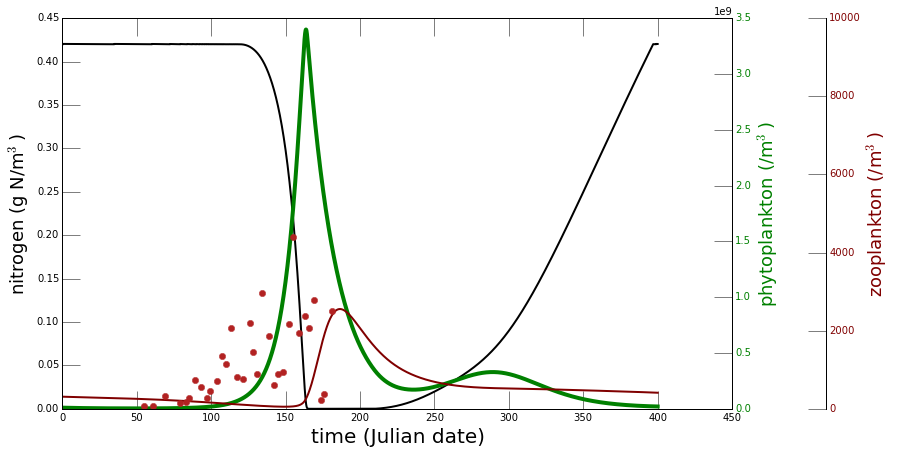

In [37]:
fig = plt.figure(figsize=(12, 7))

# Adding a title to the graph
# plt.suptitle('Comparing Model Simulations to 2009 Zooplankton Data', fontsize=30, y=1.05)

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'g-', linewidth=4)
ax3.plot(npz_model.time, npz_model.zooplankton, 'maroon', linewidth=2)
ax4.plot(zoo_2009_dd.days_from_new_year, zoo_2009_dd.Total_Zooplankton_Abundance, linestyle='', color = 'firebrick', marker = '.', markersize=12, linewidth=2)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.xaxis.set_tick_params(labelcolor='k', size=18)
ax1.yaxis.set_tick_params(labelcolor='k', size=18)
ax2.yaxis.set_tick_params(labelcolor='green', size=18)
ax3.yaxis.set_tick_params(labelcolor='maroon', size = 18)
ax4.yaxis.set_ticks([])
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('time (Julian date)', fontsize=20, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 18, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 18, color='green')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 18, color='maroon')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
ax4.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

legend = ax2.legend(loc='upper center', shadow=True)

plt.show()

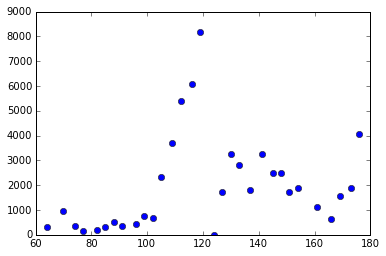

In [38]:
plt.plot(zoo_2010_dd.days_from_new_year, zoo_2010_dd.Total_Zooplankton_Abundance, 'bo')

//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


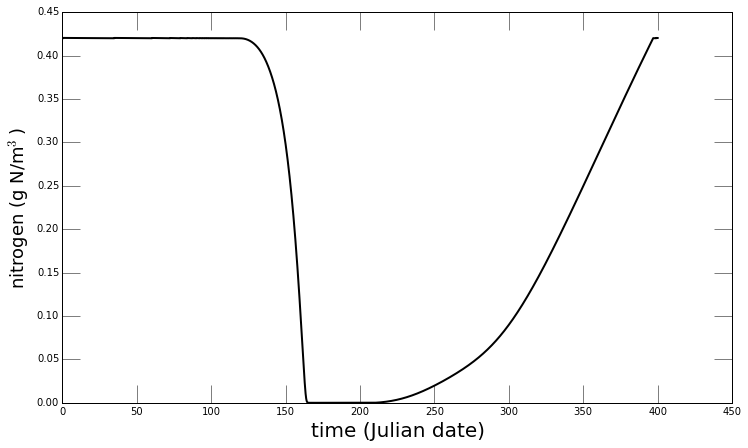

In [39]:
fig = plt.figure(figsize=(12, 7))

# Adding a title to the graph
# plt.suptitle('Comparing Model Simulations to 2009 Zooplankton Data', fontsize=30, y=1.05)

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
#ax2 = ax1.twinx()
#ax3 = ax1.twinx()
#ax4 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
#ax2.plot(npz_model.time, npz_model.phytoplankton, 'g-', linewidth=4)
#ax3.plot(npz_model.time, npz_model.zooplankton, 'maroon', linewidth=2)
#ax4.plot(zoo_2009_dd.days_from_new_year, zoo_2009_dd.Total_Zooplankton_Abundance, linestyle='', color = 'firebrick', marker = '.', markersize=12, linewidth=2)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
#npz_model.zooplankton_spine = ax3.spines['right']
#npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.xaxis.set_tick_params(labelcolor='k', size=18)
ax1.yaxis.set_tick_params(labelcolor='k', size=18)
#ax2.yaxis.set_tick_params(labelcolor='green', size=18)
#ax3.yaxis.set_tick_params(labelcolor='maroon', size = 18)
#ax4.yaxis.set_ticks([])
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('time (Julian date)', fontsize=20, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 18, color ='k')
#ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 18, color='green')
#ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 18, color='maroon')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 10000)
#ax4.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

legend = ax2.legend(loc='upper center', shadow=True)

plt.savefig('../results/n.pdf', bbox_inches='tight')

//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


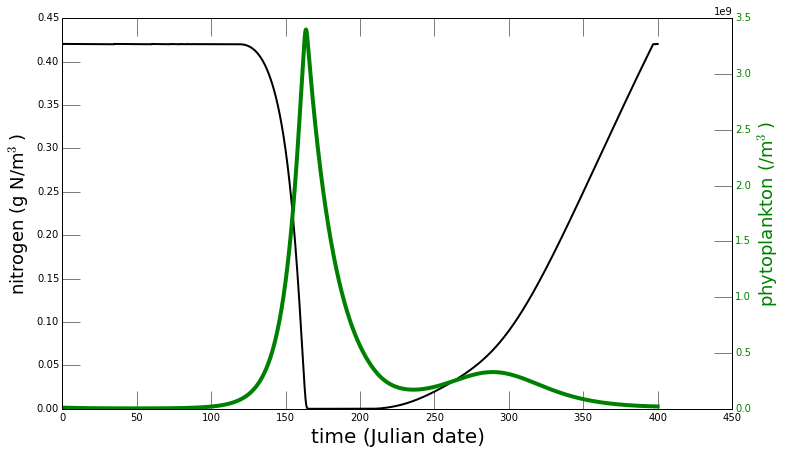

In [40]:
fig = plt.figure(figsize=(12, 7))

# Adding a title to the graph
# plt.suptitle('Comparing Model Simulations to 2009 Zooplankton Data', fontsize=30, y=1.05)

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
#ax3 = ax1.twinx()
#ax4 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'g-', linewidth=4)
#ax3.plot(npz_model.time, npz_model.zooplankton, 'maroon', linewidth=2)
#ax4.plot(zoo_2009_dd.days_from_new_year, zoo_2009_dd.Total_Zooplankton_Abundance, linestyle='', color = 'firebrick', marker = '.', markersize=12, linewidth=2)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
#npz_model.zooplankton_spine = ax3.spines['right']
#npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.xaxis.set_tick_params(labelcolor='k', size=18)
ax1.yaxis.set_tick_params(labelcolor='k', size=18)
ax2.yaxis.set_tick_params(labelcolor='green', size=18)
#ax3.yaxis.set_tick_params(labelcolor='maroon', size = 18)
#ax4.yaxis.set_ticks([])
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('time (Julian date)', fontsize=20, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 18, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 18, color='green')
#ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 18, color='maroon')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 10000)
#ax4.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

legend = ax2.legend(loc='upper center', shadow=True)

plt.savefig('../results/np.pdf', bbox_inches='tight')

//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


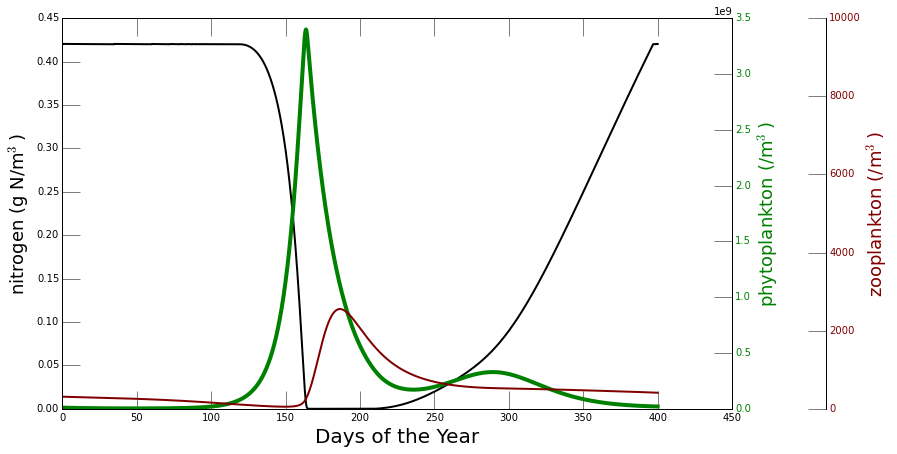

In [44]:
fig = plt.figure(figsize=(12, 7))

# Adding a title to the graph
# plt.suptitle('Comparing Model Simulations to 2009 Zooplankton Data', fontsize=30, y=1.05)

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
#ax4 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'g-', linewidth=4)
ax3.plot(npz_model.time, npz_model.zooplankton, 'maroon', linewidth=2)
#ax4.plot(zoo_2009_dd.days_from_new_year, zoo_2009_dd.Total_Zooplankton_Abundance, linestyle='', color = 'firebrick', marker = '.', markersize=12, linewidth=2)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.xaxis.set_tick_params(labelcolor='k', size=18)
ax1.yaxis.set_tick_params(labelcolor='k', size=18)
ax2.yaxis.set_tick_params(labelcolor='green', size=18)
ax3.yaxis.set_tick_params(labelcolor='maroon', size = 18)
#ax4.yaxis.set_ticks([])
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('Days of the Year', fontsize=20, y=0)
#'time (Julian date)'
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 18, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 18, color='green')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 18, color='maroon')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
#ax4.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

legend = ax2.legend(loc='upper center', shadow=True)

plt.savefig('../results/npz.pdf', bbox_inches='tight')

//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


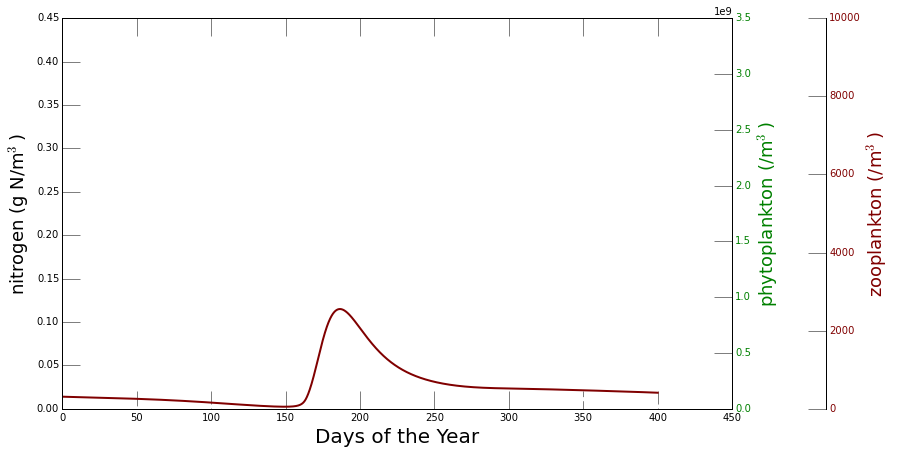

In [45]:
fig = plt.figure(figsize=(12, 7))

# Adding a title to the graph
# plt.suptitle('Comparing Model Simulations to 2009 Zooplankton Data', fontsize=30, y=1.05)

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
#ax4 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'white', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'white', linewidth=4)
ax3.plot(npz_model.time, npz_model.zooplankton, 'maroon', linewidth=2)
#ax4.plot(zoo_2009_dd.days_from_new_year, zoo_2009_dd.Total_Zooplankton_Abundance, linestyle='', color = 'firebrick', marker = '.', markersize=12, linewidth=2)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.xaxis.set_tick_params(labelcolor='k', size=18)
ax1.yaxis.set_tick_params(labelcolor='k', size=18)
ax2.yaxis.set_tick_params(labelcolor='green', size=18)
ax3.yaxis.set_tick_params(labelcolor='maroon', size = 18)
ax4.yaxis.set_ticks([])
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('Days of the Year', fontsize=20, y=0)
#'time (Julian date)'
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 18, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 18, color='green')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 18, color='maroon')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
ax4.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

legend = ax2.legend(loc='upper center', shadow=True)

plt.savefig('../results/z.pdf', bbox_inches='tight')

//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


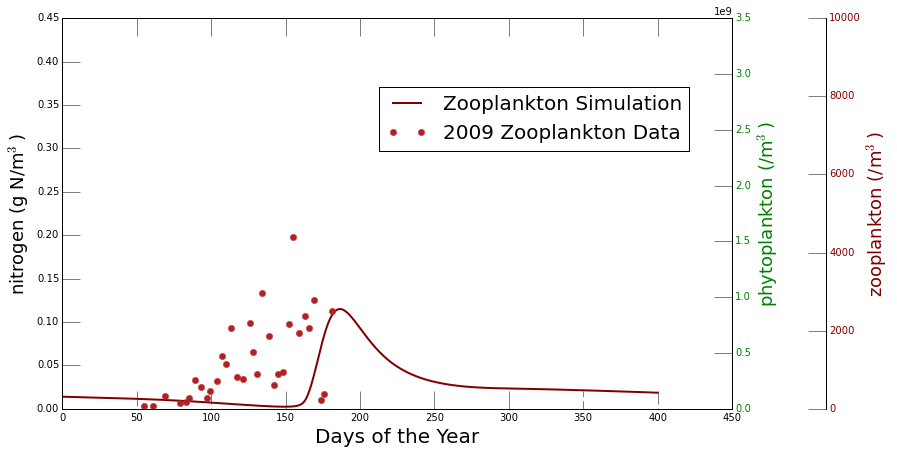

In [117]:
fig = plt.figure(figsize=(12, 7))

# Adding a title to the graph
# plt.suptitle('Comparing Model Simulations to 2009 Zooplankton Data', fontsize=30, y=1.05)

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'white', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'white', linewidth=4)
ax3.plot(npz_model.time, npz_model.zooplankton, 'maroon', linewidth=2)
ax4.plot(zoo_2009_dd.days_from_new_year, zoo_2009_dd.Total_Zooplankton_Abundance, linestyle='', color = 'firebrick', marker = '.', markersize=12, linewidth=2)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.xaxis.set_tick_params(labelcolor='k', size=18)
ax1.yaxis.set_tick_params(labelcolor='k', size=18)
ax2.yaxis.set_tick_params(labelcolor='green', size=18)
ax3.yaxis.set_tick_params(labelcolor='maroon', size = 18)
ax4.yaxis.set_ticks([])
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('Days of the Year', fontsize=20, y=0)
'time (Julian date)'
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 18, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 18, color='green')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 18, color='maroon')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
ax4.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)


maroon_line = mlines.Line2D([], [], color='maroon', label='Zooplankton Simulation', linewidth=2)#
#firebrick_dot = ax4.plot(zoo_2009_dd.days_from_new_year, zoo_2009_dd.Total_Zooplankton_Abundance, linestyle='', color = 'firebrick', marker = '.', markersize=12, linewidth=2)
firebrick_dots = mlines.Line2D([], [], color="firebrick", marker = ".", linestyle='', markersize=12, label='2009 Zooplankton Data')
plt.legend(handles=[maroon_line, firebrick_dots], bbox_to_anchor=(0.95, 0.85, 0, 0), prop={'size':20})

pylab.legend(loc='upper left')

plt.savefig('../results/zz.pdf', bbox_inches='tight')